In [25]:
import sys
import os
from os.path import split, join
base_dir = split(os.getcwd())[0]
if base_dir not in sys.path:
    sys.path.append(base_dir)
from utilities.basic import list_subdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import pickle

In [27]:
data_dir = join(base_dir, 'data')
tables_dir = join(data_dir, 'tables')
data_long_dir = join(data_dir, 't1_longitudinal')
br_df = pd.read_csv("F:\\CoBra\\Data\\volume_longitudinal_nii\\Brain_Regions.csv")
pred_df = pd.read_feather(join(data_long_dir, 'results', 'volume_prediction_results.feather'))
with open(join(data_long_dir, "sids_long_new.pkl"), 'rb') as f:
    long_sids_ls = pickle.load(f)
df = pred_df[pred_df.SeriesInstanceUID.isin(long_sids_ls)]

In [29]:
df.keys()

Index(['newID', 'SeriesInstanceUID', 'External_CSF', 'Third_Ventricle',
       'Right_Inferior_Lateral_Ventricle', 'Right_Lateral_Ventricle',
       'Left_Inferior_Lateral_Ventricle', 'Left_Lateral_Ventricle',
       'Right_Accumbens_Area', 'Right_Caudate',
       ...
       'Brain_Stem', 'Right_Cerebellum_Exterior',
       'Right_Cerebellum_White_Matter', 'Left_Cerebellum_Exterior',
       'Left_Cerebellum_White_Matter', 'Cerebellar_Vermal_Lobules_I_V',
       'Cerebellar_Vermal_Lobules_VI_VII', 'Cerebellar_Vermal_Lobules_VIII_X',
       'Background', 'Whole_Brain'],
      dtype='object', length=137)

In [30]:
wb_out_df = pred_df[np.abs(stats.zscore(pred_df.Whole_Brain)) > 3]
wb_out_df

,newID,SeriesInstanceUID,External_CSF,Third_Ventricle,Right_Inferior_Lateral_Ventricle,Right_Lateral_Ventricle,Left_Inferior_Lateral_Ventricle,Left_Lateral_Ventricle,Right_Accumbens_Area,Right_Caudate,...,Brain_Stem,Right_Cerebellum_Exterior,Right_Cerebellum_White_Matter,Left_Cerebellum_Exterior,Left_Cerebellum_White_Matter,Cerebellar_Vermal_Lobules_I_V,Cerebellar_Vermal_Lobules_VI_VII,Cerebellar_Vermal_Lobules_VIII_X,Background,Whole_Brain
57,003310,f3365ef7a2c95cebe0d44b231cd6ed28,0,0,0,2,0,108,0,4,...,0,1925,0,5053,0,0,0,0,16725469,51747
473,023797,03ea24930fc139e8af20bb55db43ab45,0,0,0,1493,0,6899,0,0,...,6933,11212,3180,18629,4434,0,0,0,16654668,122548
547,028822,5428d57b6ddea39c8de3f4b83d68a207,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16776179,1037
685,034650,db2ee13d34fc6f8cf0d3960d2c57e56f,0,0,0,0,499,14162,0,0,...,104,2929,683,36325,9797,0,0,0,16405989,371227
720,036992,4ef9707affc9b5c54ec00ec15d6b644f,296,2712,1683,38986,1953,61802,27,4337,...,24400,65818,11297,139334,16073,0,0,0,14628090,2149126
778,039377,3ab4be3a2a4042ada27324e235da421f,0,0,0,241,0,625,0,0,...,0,6,0,0,0,0,0,0,16720094,57122
779,039378,3b70f7f01b1728908a80e6019f8ca670,0,0,0,31,0,706,0,0,...,5,310,9,131,3,0,0,0,16741499,35717
780,039383,632eeaf390547dddd11ce7190b50aa66,0,0,0,103,0,977,0,0,...,0,24,1,758,9,0,0,0,16709693,67523
781,039384,6baff7321eee67aec6a4c6667f4fad68,0,0,0,336,0,2944,0,0,...,6,344,0,1988,66,0,0,0,16701621,75595
782,039386,71d735443f00918ed82c069a15c7a367,0,0,0,405,0,588,0,0,...,0,153,0,0,0,0,0,0,16731876,45340


<AxesSubplot:ylabel='Whole_Brain'>

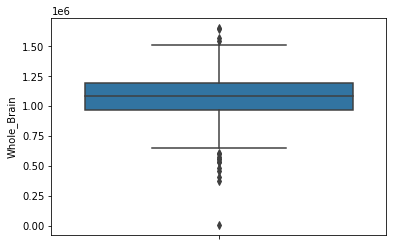

In [31]:
sns.boxplot(data = df, y='Whole_Brain')